# 1D wave equation

Written by Ali A. Eftekhari

- Last checked: June 2021
- Ported to Python by Gavin M. Weir, June 2023
- Update by M. H. V. Werts, October 2025

### PDE and boundary conditions
The homogeneous wave equation reads

 $$\frac{\partial^2 c}{\partial t^2} = u^2 \frac{\partial^2 c}{\partial x^2},$$

 where $c$ is the independent variable (displacement, concentration, temperature, etc)
 , $u$ is the characteristic velocity.
 
 The inhomogeneous wave equation with initial conditions on the value and derivative of the concentration takes the form 
 
 \begin{align}
     & \frac{\partial^2 c\left(x,t\right)}{\partial t^2} - u^2 \frac{\partial^2 c\left(x,t\right)}{\partial x^2} = s\left(x,t\right) \\
     & c\left(x, 0\right) = f\left(x\right) \\
     & \frac{\partial c}{\partial t}\left(x, 0\right) = g\left(x\right)
 \end{align}
 

In [1]:
import pyfvtool as pf
import numpy as np

# for animation and visualization
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def c(x):
    return x*x

def dc(x):
    return 2.0*x

In [3]:
Lx = float(1.0)   # length of domain
Nx = int(200)     # number of cells in domain
dx = Lx/Nx        # step-size in uniform 1d grid
m = pf.Grid1D(Nx, Lx) # 1D domain

In [4]:
x_face=m.facecenters.x   # face positions
x_cell=m.cellcenters.x   # node positions

In [5]:
# initial value on grid
u0 = np.abs(np.sin(x_cell/Lx*10*np.pi))

# Velocity on grid nodes (cell centers)
u = pf.CellVariable(m, u0);

In [6]:
# Boundary conditions
u.BCs.left.periodic = True
u.BCs.right.periodic = True

In [7]:
# Initialize the face concenrtation values and their derivatives at the faces 
c_face = pf.FaceVariable(m, 0.0)     # concentration values
c_face.xvalue = c(x_face)    

In [8]:
# concentration derivative
dc_cell = pf.CellVariable(m, dc(x_cell))  

In [9]:
dt = 0.1  # time-step for calculations

In [10]:
ui = [u.copy()] # store initial condition
for ii in range(2000): 
    # Solve the PDE, single time step
    pf.solvePDE(u, [ pf.transientTerm(u, dt, 1.0),
                     pf.convectionUpwindTerm(c_face),
                    -pf.linearSourceTerm(dc_cell)])
    # Store solution at next index
    ui.append(u.copy())    # It is essential to COPY the CellVariable
                           # if the current values need to be conserved for the future.
                           # Each call to solvePDE() replaces the values in the original
                           # CellVariable.

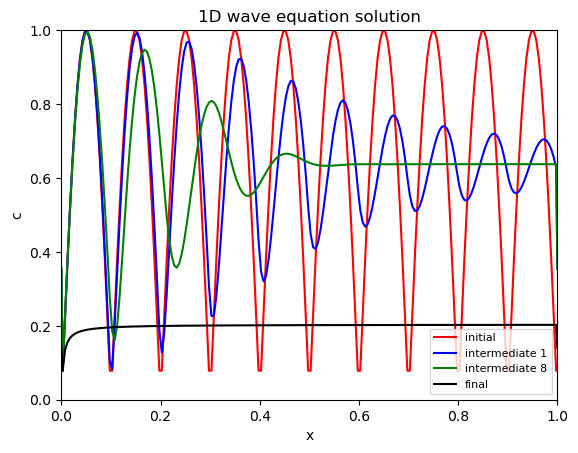

In [11]:
# Plotting and visualization of the 1D wave equation solution  

hfig1, ax1 = plt.subplots()

xx, uu = ui[0].plotprofile()
ax1.plot(xx, uu, 'r-', label='initial')

xx, uu = ui[1].plotprofile()
ax1.plot(xx, uu, 'b-', label='intermediate 1')

xx, uu = ui[8].plotprofile()
ax1.plot(xx, uu, 'g-', label='intermediate 8')

xx, uu = ui[-1].plotprofile()
ax1.plot(xx, uu, 'k-', label='final')

ax1.set_xlim((0, Lx))
ax1.set_ylim((0.0, 1.0))

ax1.set_xlabel('x')
ax1.set_ylabel('c')
ax1.set_title('1D wave equation solution')
ax1.legend(fontsize=8);